This module will contain the practice assignment for module 2.
It is based on the Pytorch workflow fundamentals

In [1]:
import torch

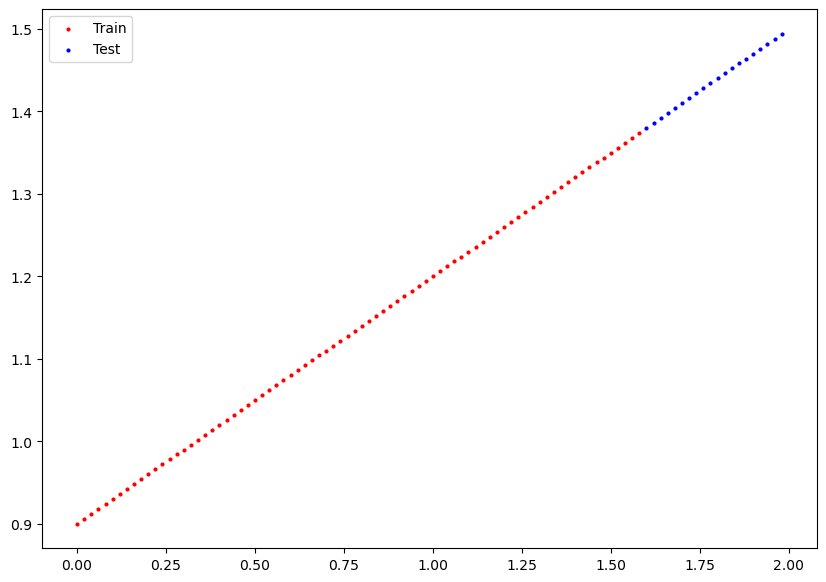

In [14]:
# 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

weight = 0.3
bias = 0.9

X = torch.arange(0,2,0.02).unsqueeze(1)
Y = weight*X + bias

# Split the data into 80% training, 20% testing.
train_size = int(0.8 * len(X))
X_train = X[:train_size]
Y_train = Y[:train_size]

X_test = X[train_size:]
Y_test = Y[train_size:]

# Plot the training and testing data so it becomes visual

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train, color='r', s=4, label="Train")
plt.scatter(X_test,Y_test, color='b', s=4, label="Test")
plt.legend()

In [22]:
# 2. Build a PyTorch model by subclassing nn.Module
# Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
# Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
class LRModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.rand(1,requires_grad=True))
        self.bias = torch.nn.Parameter(torch.rand(1,requires_grad=True))
    
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias
    
# Once you've constructed the model, make an instance of it and check its state_dict().
model1 = LRModel()
model1.state_dict()

OrderedDict([('weights', tensor([0.7070])), ('bias', tensor([0.1049]))])

In [23]:
# 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
loss_func = torch.nn.L1Loss()
# Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2
opt = torch.optim.SGD(params = model1.parameters(), lr=0.01)

# Write a training loop to perform the appropriate training steps for 300 epochs
